In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n_data = 50
x = np.linspace(0,1,n_data)
X = x[0:50:5]
y = np.sin(2*np.pi*x)
y_data = np.random.normal(loc=0, scale=0.3, size=(len(X))) + y[0:50:5]
print(X.shape)
print("\n")
print(X)
print("\n")
print(x.shape)

(10,)


[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735]


(50,)


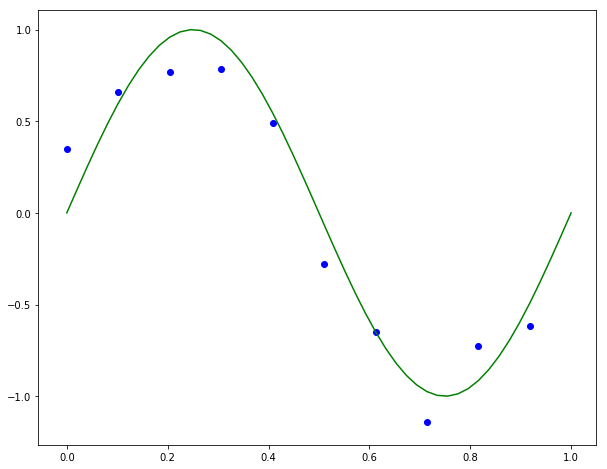

In [4]:
plt.figure(figsize=(10,8))
plt.plot(x,y,c='green')
plt.scatter(X,y_data,c='blue')

In [5]:
#Order
M = 9
M = M+1

In [6]:
xsum = np.zeros((1,M*2))

for i in range(M*2):
    xsum[0][i] = sum(X ** i)

In [7]:
S = np.zeros((M,M))
Y = np.zeros((1,M))

for i in range(M):
    for j in range(M):
        S[i][j] = xsum[0][i+j]
    Y[0][i] = sum(y_data*(X ** i))

In [8]:
# S * W = Y
print(S.shape)
print("\n")
print(Y.shape)

W = np.linalg.solve(S,Y.T)
W = W.T
print(W)

(10, 10)


(1, 10)
[[ 3.45887401e-01 -5.36939094e+01  1.50695446e+03 -1.56379252e+04
   8.41100914e+04 -2.61216794e+05  4.84836486e+05 -5.30218305e+05
   3.14898725e+05 -7.82728268e+04]]


In [9]:
y_pred = 0

for i in range(M):
    y_pred = W[0][i]*(x**i) + y_pred

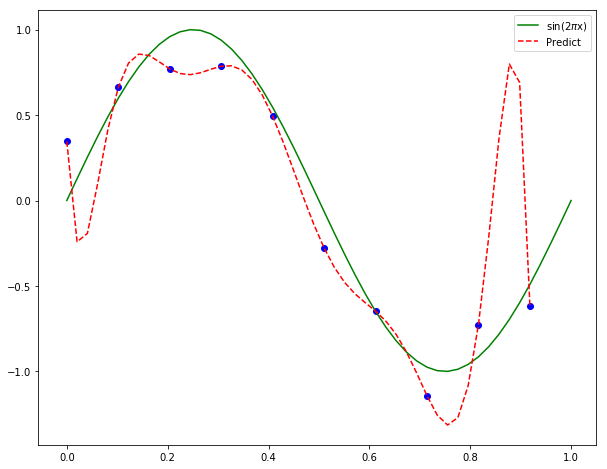

In [10]:
plt.figure(figsize=(10,8))
plt.plot(x,y,c='green',label='sin(2$\pi$x)')
plt.scatter(X,y_data,c='blue')
plt.plot(x[:-4],y_pred[:-4],'r--',label='Predict')
plt.legend()

## Implement ##

In [11]:
print(X.shape)
print("\n")
print(y_data.shape)

(10,)


(10,)


In [12]:
def linear_regressor(x_data, y_data, M):
    M = M+1
    
    xsum = np.zeros((1,M*2))

    for i in range(M*2):
        xsum[0][i] = sum(x_data ** i)
    
    S = np.zeros((M,M))
    Y = np.zeros((1,M))

    for i in range(M):
        for j in range(M):
            S[i][j] = xsum[0][i+j]
        Y[0][i] = sum(y_data*(x_data ** i))
    
    # S * W = Y

    W = np.linalg.solve(S,Y.T)
    W = W.T
    
    y_pred = 0
    
    x = np.linspace(x_data[0],x_data[len(x_data)-1],50)

    for i in range(M):
        y_pred = W[0][i]*(x**i) + y_pred
    
    return y_pred

y_pred_test = linear_regressor(X,y_data,0)

(50,)


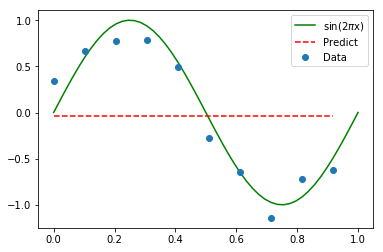

In [13]:
print(y_pred_test.shape)
plt.plot(x,y,c='green',label='sin(2$\pi$x)')
plt.plot(np.linspace(X[0],X[len(X)-1],50),y_pred_test,'r--',label='Predict')
plt.plot(X,y_data,'o',label='Data')
plt.legend()

In [14]:
y_pred_test = y_pred_test[0:50:5]
y_pred_test.shape

(10,)

In [15]:
L = 15

E_rms = np.zeros(L)

M_plt = np.zeros(L)

for i in range(L):
    M_plt[i] = i
    aux = linear_regressor(X,y_data,i)
    aux = aux[0:50:5]
    E_rms[i] = (sum((aux - y_data) ** 2) / len(y_pred_test)) ** 0.5


Text(0,0.5,'$E(w)$')

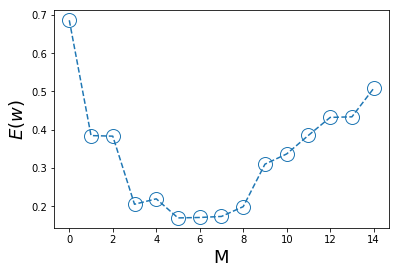

In [24]:
plt.plot(M_plt,E_rms, 'o--', markerfacecolor="None", ms=14)
plt.xlabel('M', fontsize=18)
plt.ylabel('$E(w)$', fontsize=18)